In [1]:
import os
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
from worlds.worlds import CSTR
from multitask.cstr_generate import CSTR_Task, visualize_tasks
import copy

In [2]:
params_nom = {'C_A0': 0.8,
              'k0_list': [1.0, 0.7, 0.1, 0.006],
              'E_list': [8.33, 10.0, 50.0, 83.3]}

params_pert = {'C_A0': 0.75,
                   'k0_list': [1.0, 0.7, 0.1, 0.006],
                   'E_list': [7.33, 9.0, 60.0, 93.3]}

In [3]:
task_nom = CSTR_Task(params_nom, rand_input_u=False, rand_init_state=False, seed=42)
task_pert = CSTR_Task(params_pert, rand_input_u=False, rand_init_state=False, seed=42)

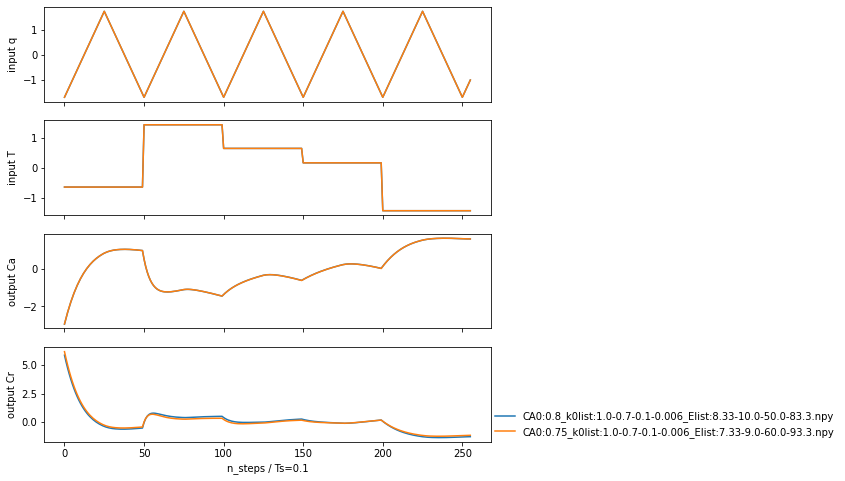

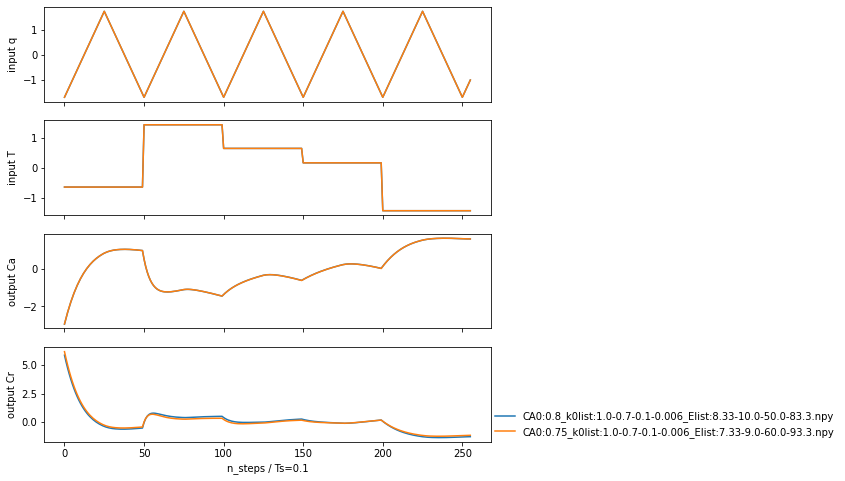

In [4]:
visualize_tasks([task_nom, task_pert])

In [5]:
task_nom.train_data.shape

(64, 256, 4)

In [4]:
def generate_tasks():
    params_nom = {'C_A0': 0.8,
              'k0_list': [1.0, 0.7, 0.1, 0.006],
              'E_list': [8.33, 10.0, 50.0, 83.3]}
    params = []
    tasks = []
    # multiply E_list:
    for i in range(1,11):
        new_params = copy.deepcopy(params_nom)
        # e_array = i*np.array(new_params['E_list']) ## no impact
        # new_params['E_list'] = e_array.tolist()
        # new_params['E_list'][0]= new_params['E_list'][0]*i**2 ## no impact

        new_params['C_A0'] *= i ## impact
        e_array = np.array(new_params['k0_list']) * i**3 ## impact
        new_params['k0_list'] = e_array.tolist()
        params.append(new_params)
        tasks.append(CSTR_Task(new_params, n_traj=1, rand_input_u=False, rand_init_state=False, seed=42))

    return params, tasks

params, tasks = generate_tasks()

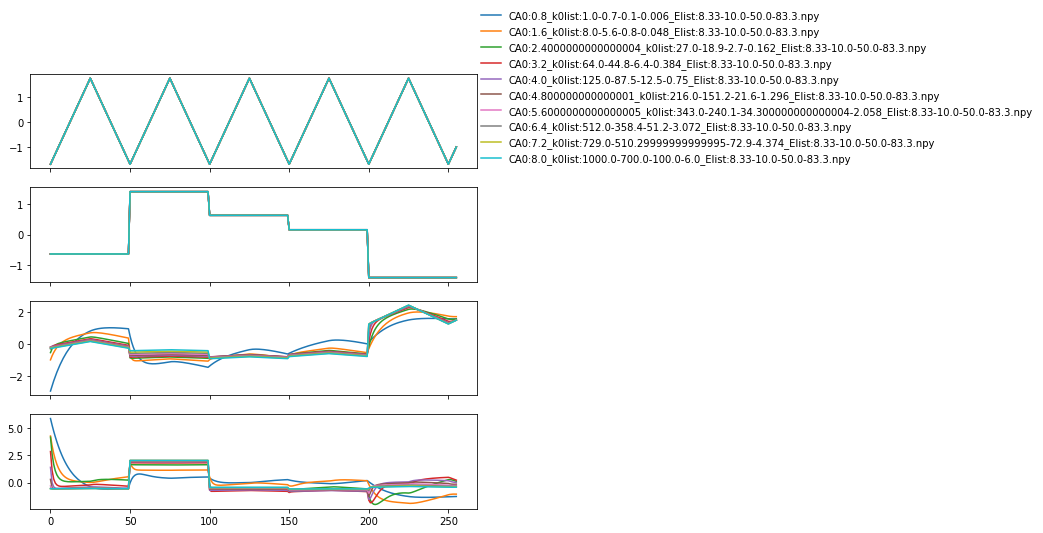

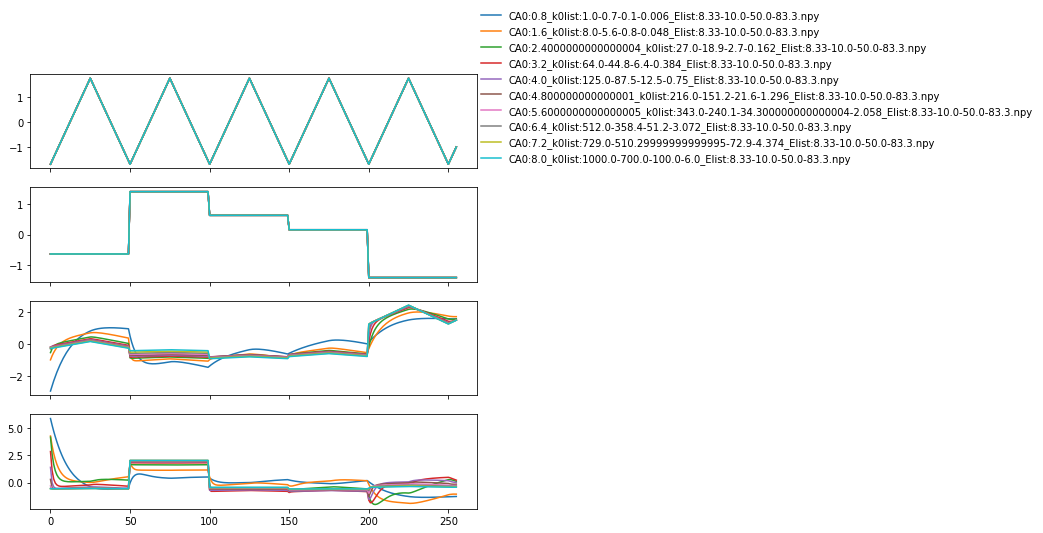

In [50]:
visualize_tasks(tasks)

In [6]:
params_nom = {'C_A0': 0.8,
              'k0_list': [1.0, 0.7, 0.1, 0.006],
              'E_list': [16.33, 10.0, 50.0, 83.3]}

In [7]:
params_var0 = {'C_A0': 0.8,
              'k0_list': [1.0, 0.7, 0.1, 0.006],
              'E_list': [8.33, 20.0, 50.0, 83.3]}
task_var0 = CSTR_Task(params_var0, rand_input_u=False, rand_init_state=False, seed=42)

In [9]:
params_var1 = {'C_A0': 0.8,
              'k0_list': [1.0, 0.7, 0.1, 0.006],
              'E_list': [8.33, 10.0, 100.0, 83.3]}
task_var1 = CSTR_Task(params_var1, rand_input_u=False, rand_init_state=False, seed=42)

In [10]:
params_var2 = {'C_A0': 0.8,
              'k0_list': [1.0, 0.7, 0.1, 0.006],
              'E_list': [8.33, 10.0, 50.0, 166.6]}
task_var2 = CSTR_Task(params_var2, rand_input_u=False, rand_init_state=False, seed=42)

In [11]:
params_var3 = {'C_A0': 0.8,
              'k0_list': [1.0, 0.7, 0.1, 0.006],
              'E_list': [16.66, 10.0, 50.0, 83.3]}
task_var3 = CSTR_Task(params_var3, rand_input_u=False, rand_init_state=False, seed=42)

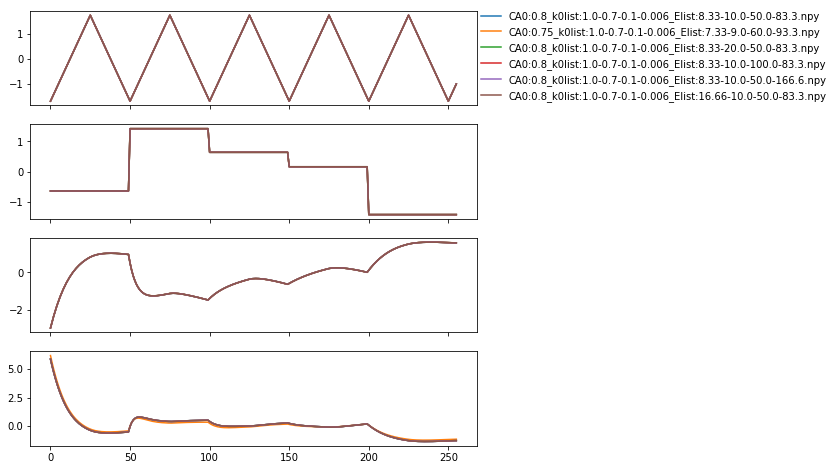

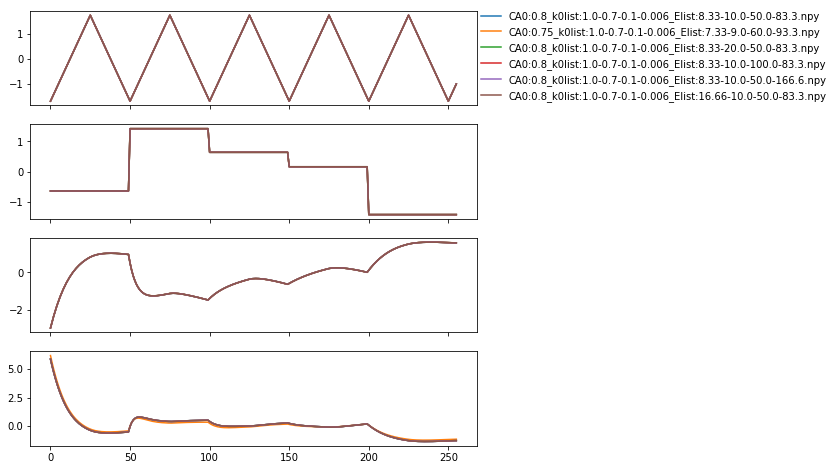

In [15]:
visualize_tasks([task_nom, task_pert, task_var0, task_var1, task_var2, task_var3], traj_index=5)